<a href="https://colab.research.google.com/github/zidnytaqiyaaa/Bike-Sharing-Analisis/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Your_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
#Type your code here

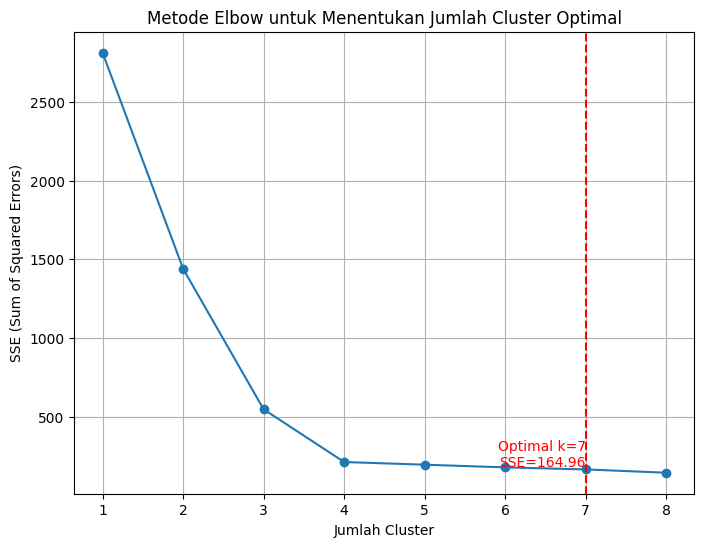

Jumlah cluster optimal (k) adalah 7.
Nilai SSE pada k=7 adalah 164.96.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Membuat dataset buatan
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Menentukan rentang jumlah cluster yang akan diuji
range_n_clusters = range(1, 9)

# Menyimpan hasil SSE untuk setiap jumlah cluster
sse = []

# Menghitung SSE untuk setiap jumlah cluster
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Menentukan titik elbow terbaik
# Menghitung perubahan pada SSE
slope_changes = np.diff(sse, 2)  # Menghitung perubahan kedua pada SSE
optimal_k = np.argmin(slope_changes) + 2  # +2 karena np.diff mengurangi panjang array

# Membuat plot untuk menentukan titik elbow
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, sse, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)

# Menandai titik elbow pada plot
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.text(optimal_k, sse[optimal_k-1], f'Optimal k={optimal_k}\nSSE={sse[optimal_k-1]:.2f}', horizontalalignment='right', verticalalignment='bottom', color='r')

plt.show()

# Menampilkan hasil
print(f'Jumlah cluster optimal (k) adalah {optimal_k}.')
print(f'Nilai SSE pada k={optimal_k} adalah {sse[optimal_k-1]:.2f}.')

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
pip install kmodes

In [9]:
# Data Handling
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Clustering
from kmodes.kprototypes import KPrototypes

# Evaluasi Clustering
from sklearn.metrics import silhouette_score

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as snszq
import seaborn as sns
from sklearn.decomposition import PCA

**Penjelasan Library:**
- pandas: Untuk manipulasi data dan pengolahan dataset.
- numpy: Untuk operasi array dan matriks, biasanya digunakan dalam pengolahan data numerik.
- sklearn.preprocessing: Untuk normalisasi data (MinMaxScaler) dan encoding kolom kategorikal (LabelEncoder).
- sklearn.feature_selection: Untuk feature selection menggunakan Mutual Information.
- kmodes.kprototypes: Untuk algoritma K-Prototypes yang menggabungkan data numerik dan kategorikal dalam clustering.
- sklearn.metrics: Untuk evaluasi model clustering menggunakan Silhouette Score.
- matplotlib dan seaborn: Untuk visualisasi data dan hasil clustering.
- sklearn.decomposition: Untuk mengurangi dimensi data dengan PCA (Principal Component Analysis), yang digunakan dalam visualisasi clustering.

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [5]:
!git clone https://github.com/zidnytaqiyaaa/ClusteringKlasifikasiData.git

Cloning into 'ClusteringKlasifikasiData'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 25.73 KiB | 8.58 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [6]:
%cd ClusteringKlasifikasiData

/content/ClusteringKlasifikasiData


In [7]:
data = pd.read_csv("LungCancerDataset.csv")
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Yes,NO
1,F,55,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,NO
2,F,78,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,YES
3,M,60,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,YES
4,F,80,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,NO
2996,F,75,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,Yes,NO
2997,F,62,No,No,No,Yes,No,No,No,No,Yes,Yes,No,No,No,YES
2998,M,30,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Yes,No,YES


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

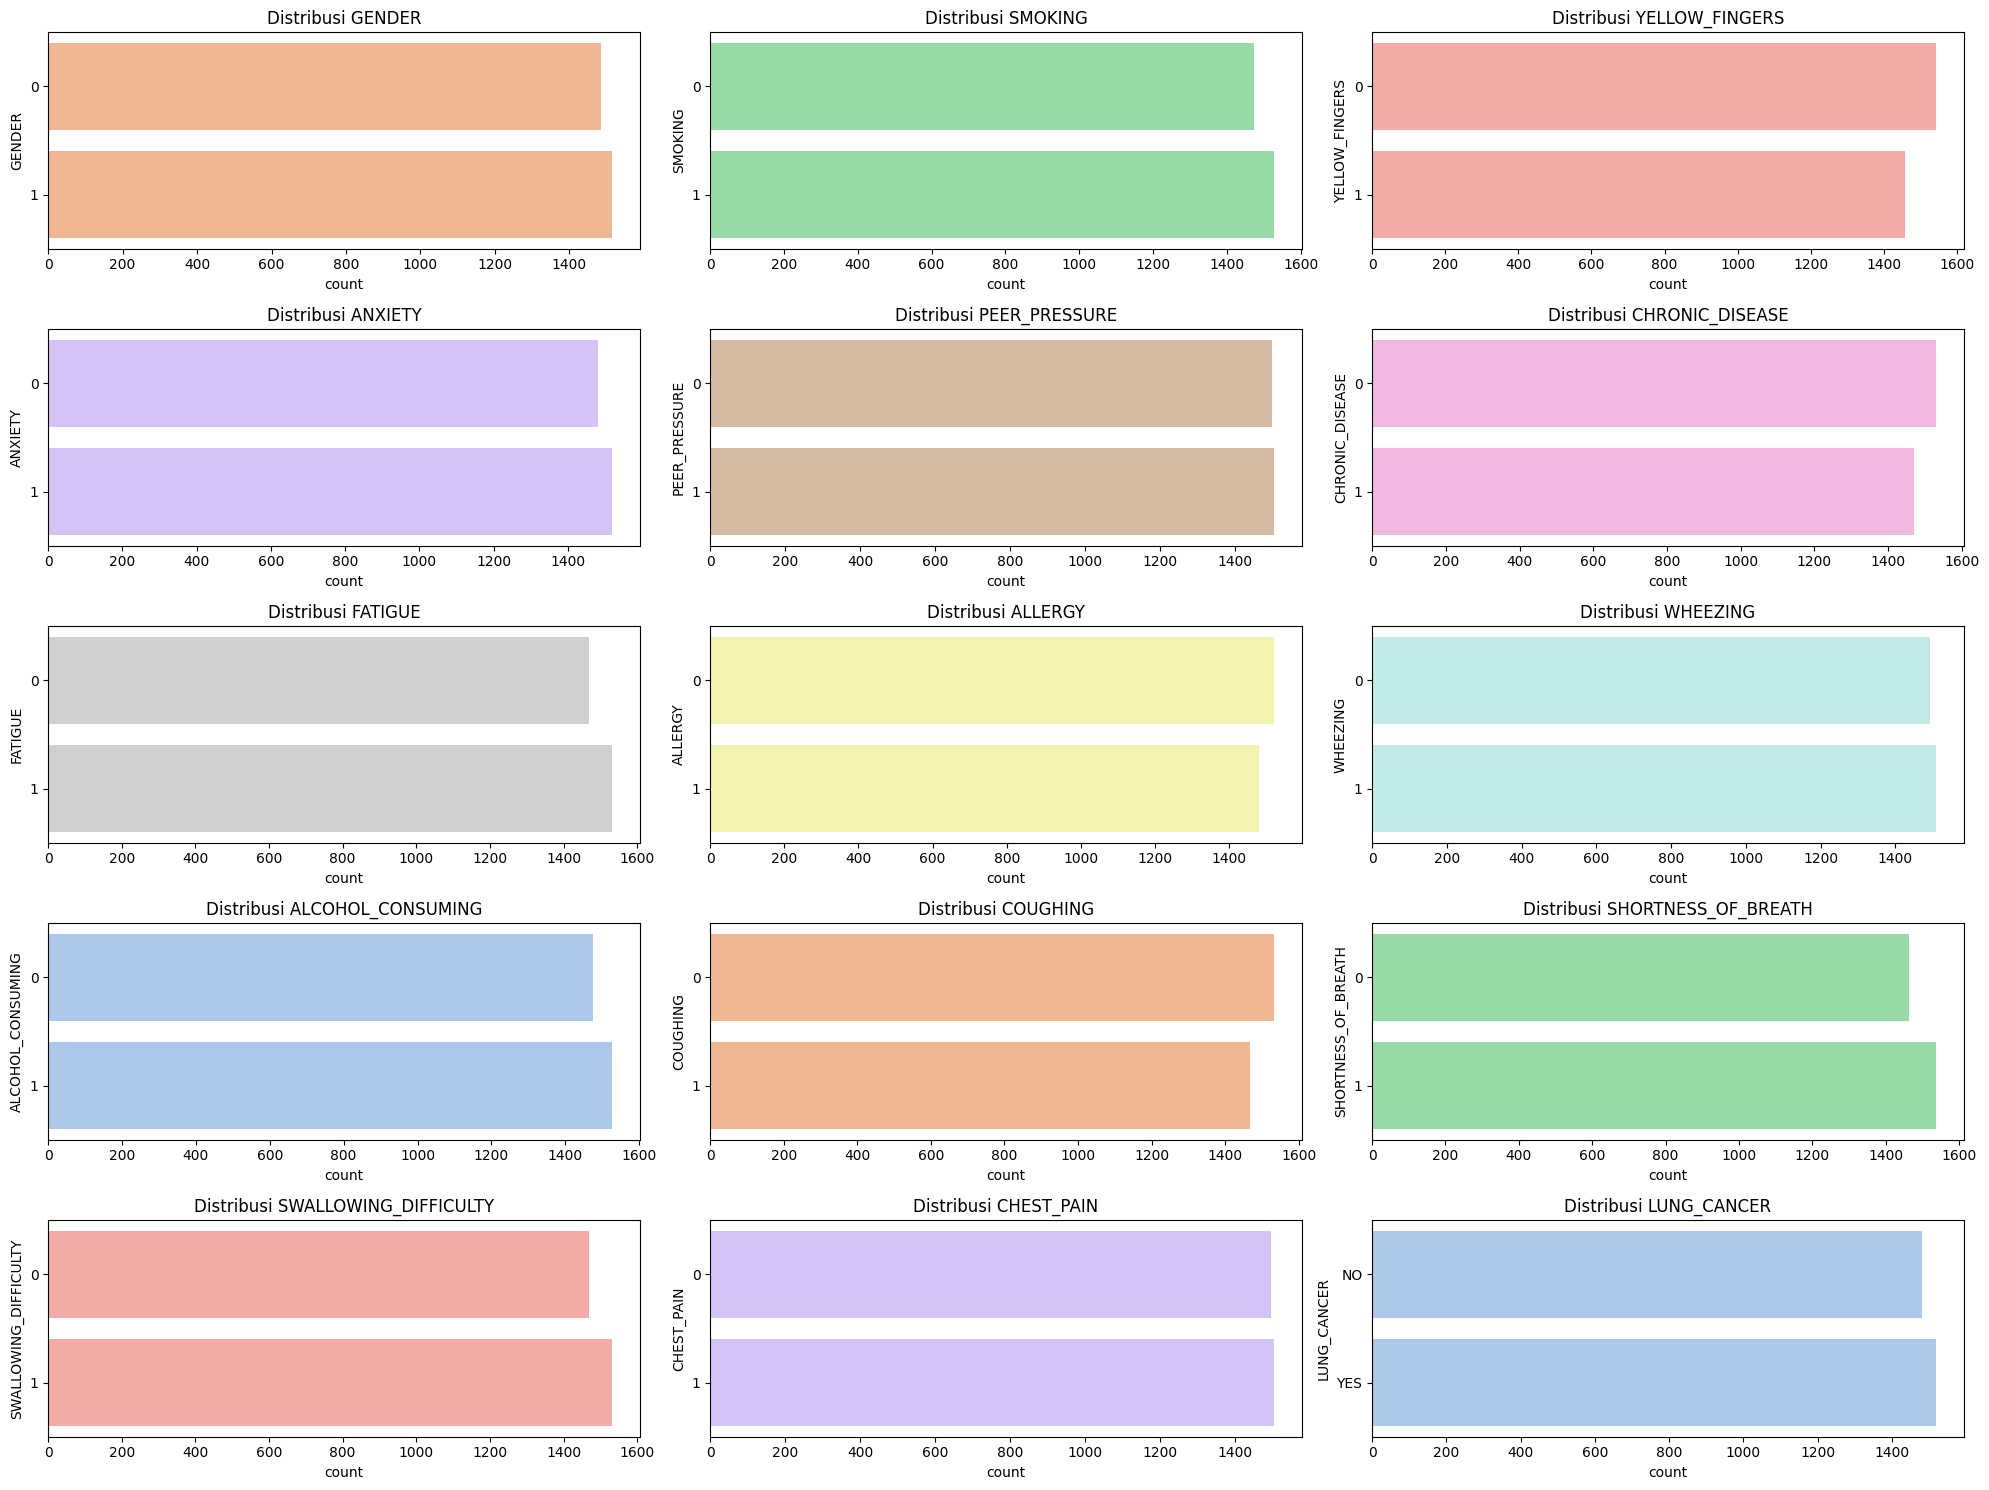

In [33]:
# Menampilkan distribusi untuk kolom kategorikal
categorical_cols = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                    'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE',
                    'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING',
                    'COUGHING', 'SHORTNESS_OF_BREATH',
                    'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']

# Buat daftar warna pastel
pastel_colors = sns.color_palette("pastel", len(categorical_cols))

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    # Gunakan warna pastel untuk setiap plot
    sns.countplot(y=data[col], color=pastel_colors[i % len(pastel_colors)])
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

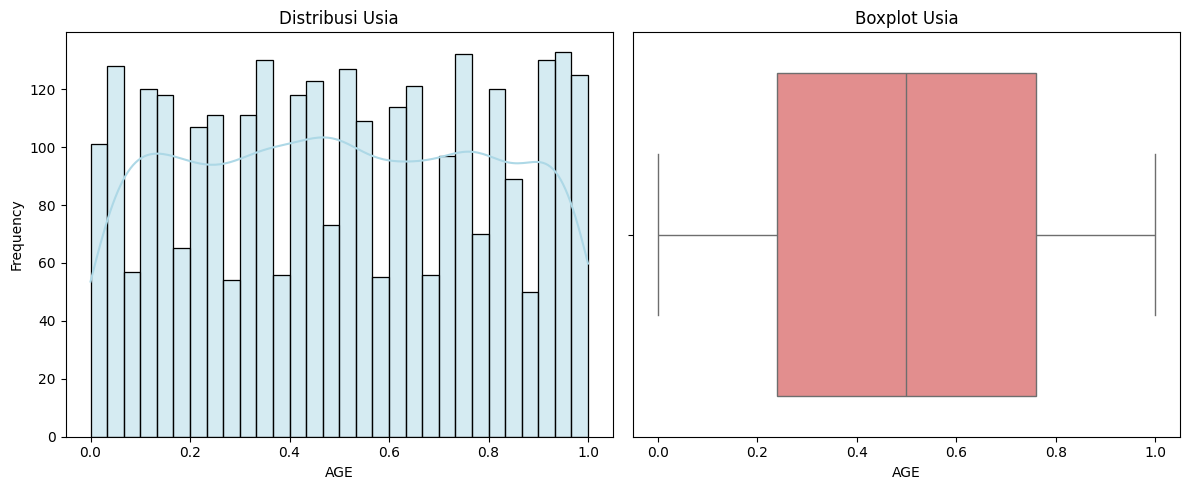

In [27]:
# Kolom numerik
numerical_cols = ['AGE']

# Membuat figur dengan tata letak dua grafik berdampingan
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribusi data numerik dengan histogram
sns.histplot(data['AGE'], kde=True, color='lightblue', bins=30, ax=axes[0])
axes[0].set_title("Distribusi Usia")
axes[0].set_xlabel("AGE")
axes[0].set_ylabel("Frequency")

# Boxplot untuk mendeteksi outlier
sns.boxplot(x=data['AGE'], color='lightcoral', ax=axes[1])
axes[1].set_title("Boxplot Usia")

# Menampilkan grafik
plt.tight_layout()
plt.show()

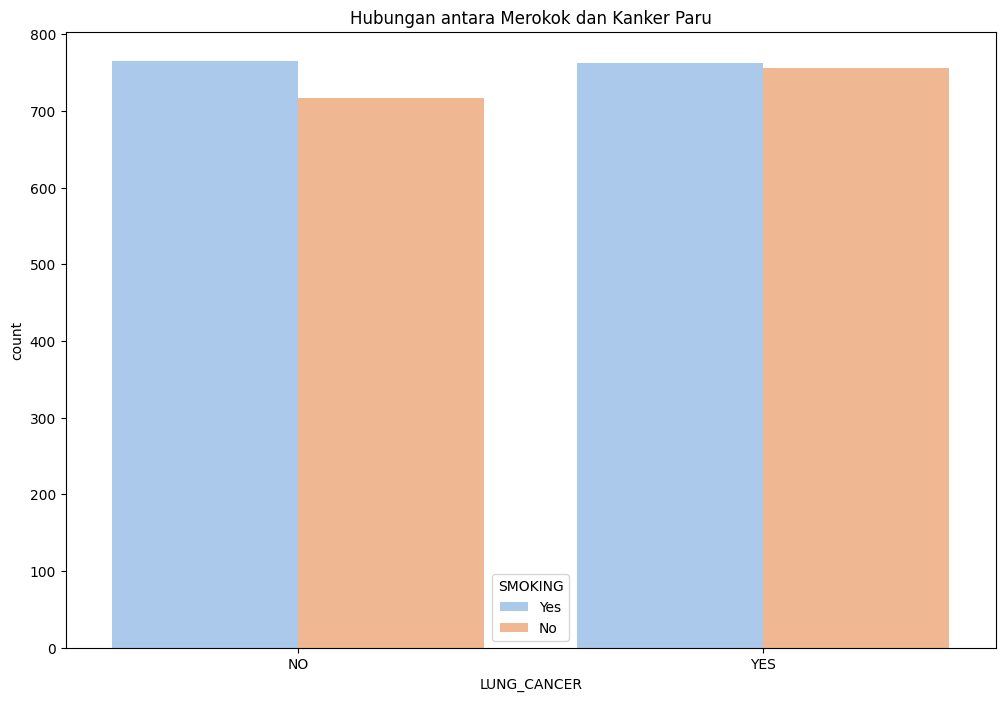

<ipython-input-16-a2828e67e6d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LUNG_CANCER', y='AGE', data=data, palette='pastel')


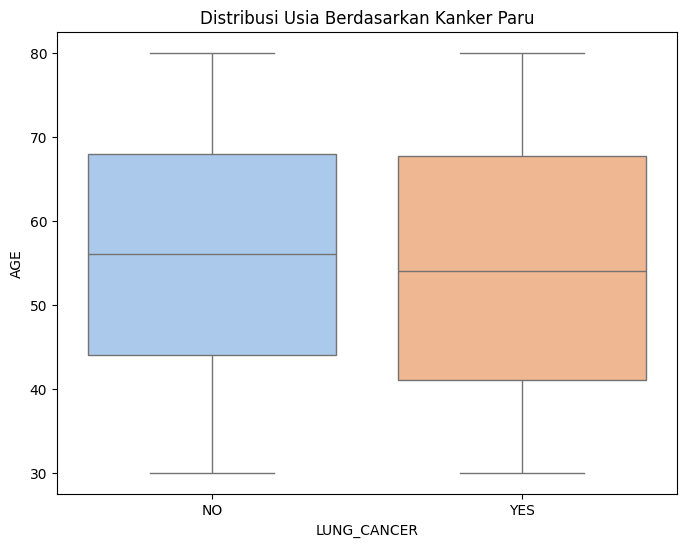

In [16]:
# Hubungan antara target dan fitur kategorikal
plt.figure(figsize=(12, 8))
sns.countplot(x='LUNG_CANCER', hue='SMOKING', data=data, palette='pastel')
plt.title("Hubungan antara Merokok dan Kanker Paru")
plt.show()

# Distribusi usia berdasarkan target
plt.figure(figsize=(8, 6))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=data, palette='pastel')
plt.title("Distribusi Usia Berdasarkan Kanker Paru")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [17]:
# Identifikasi kolom numerik dan kategorikal
numerical_cols = ['AGE']  # Kolom numerik
categorical_cols = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                    'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY',
                    'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING',
                    'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']  # Kolom kategorikal

# Encode data kategorikal menjadi numerik
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalisasi kolom numerik
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Simpan data yang telah diproses
processed_data = data.copy()

In [34]:
processed_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,0.70,1,1,1,0,0,1,0,0,0,0,0,0,1,NO
1,0,0.50,1,0,0,1,1,0,0,0,1,1,1,0,0,NO
2,0,0.96,0,0,1,1,1,0,1,0,1,1,0,1,1,YES
3,1,0.60,0,1,1,1,0,1,0,1,1,0,1,0,0,YES
4,0,1.00,1,1,0,1,1,0,1,0,1,1,1,1,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0.82,0,1,1,0,0,1,1,1,1,0,1,1,0,NO
2996,0,0.90,1,0,1,1,1,0,0,0,0,1,1,0,1,NO
2997,0,0.64,0,0,0,1,0,0,0,0,1,1,0,0,0,YES
2998,1,0.00,1,1,0,0,0,0,0,0,0,1,0,1,0,YES


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [22]:
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes

# Salin dataset yang diproses
processed_data_encoded = processed_data.copy()

# 1. Pastikan semua kolom kategorikal dikodekan menjadi angka
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    processed_data_encoded[col] = le.fit_transform(processed_data_encoded[col].astype(str))  # Pastikan tipe data string
    label_encoders[col] = le

# 2. Verifikasi bahwa semua data sudah numerik
print(processed_data_encoded.dtypes)  # Pastikan semua kolom numerik
print(processed_data_encoded.head())  # Lihat data hasil encoding

# 3. Konversi dataset ke array
data_array = processed_data_encoded.to_numpy()

# 4. Identifikasi indeks kolom kategorikal
categorical_indices = [
    processed_data_encoded.columns.get_loc(col) for col in categorical_cols
]

# 5. Inisialisasi model K-Prototypes
kproto = KPrototypes(n_clusters=3, init='Cao', random_state=42)

# 6. Fit dan predict dengan data numerik
try:
    clusters = kproto.fit_predict(data_array, categorical=categorical_indices)
    # Tambahkan hasil clustering ke dataset
    processed_data['Cluster'] = clusters
    print("Clustering selesai! Berikut adalah data dengan cluster:")
    print(processed_data.head())
except ValueError as e:
    print(f"Error saat menjalankan K-Prototypes: {e}")

GENDER                     int64
AGE                      float64
SMOKING                    int64
YELLOW_FINGERS             int64
ANXIETY                    int64
PEER_PRESSURE              int64
CHRONIC_DISEASE            int64
FATIGUE                    int64
ALLERGY                    int64
WHEEZING                   int64
ALCOHOL_CONSUMING          int64
COUGHING                   int64
SHORTNESS_OF_BREATH        int64
SWALLOWING_DIFFICULTY      int64
CHEST_PAIN                 int64
LUNG_CANCER               object
dtype: object
   GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1  0.70        1               1        1              0   
1       0  0.50        1               0        0              1   
2       0  0.96        0               0        1              1   
3       1  0.60        0               1        1              1   
4       0  1.00        1               1        0              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  A

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [25]:
# Ekstrak data numerik dan kategorikal
X_num, X_cat = data_array[:, [i for i in range(data_array.shape[1]) if i not in categorical_indices]], \
               data_array[:, categorical_indices]

# Definisikan fungsi metrik untuk kombinasi numerik dan kategorikal
def mixed_distance(X, Y):
    num_distance = np.linalg.norm(X[:, :X_num.shape[1]] - Y[:, :X_num.shape[1]], axis=1)
    cat_distance = np.sum(X[:, X_num.shape[1]:] != Y[:, X_num.shape[1]:], axis=1)
    return num_distance + cat_distance

# Konversi cluster ke format array
cluster_labels = np.array(clusters)

# Hitung Silhouette Score
silhouette_avg = silhouette_score(data_array, cluster_labels, metric=mixed_distance)
print(f"Silhouette Score: {silhouette_avg}")

NameError: name 'KMeans' is not defined

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.